<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/logistic%20regression%20updated%20script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Summary Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.

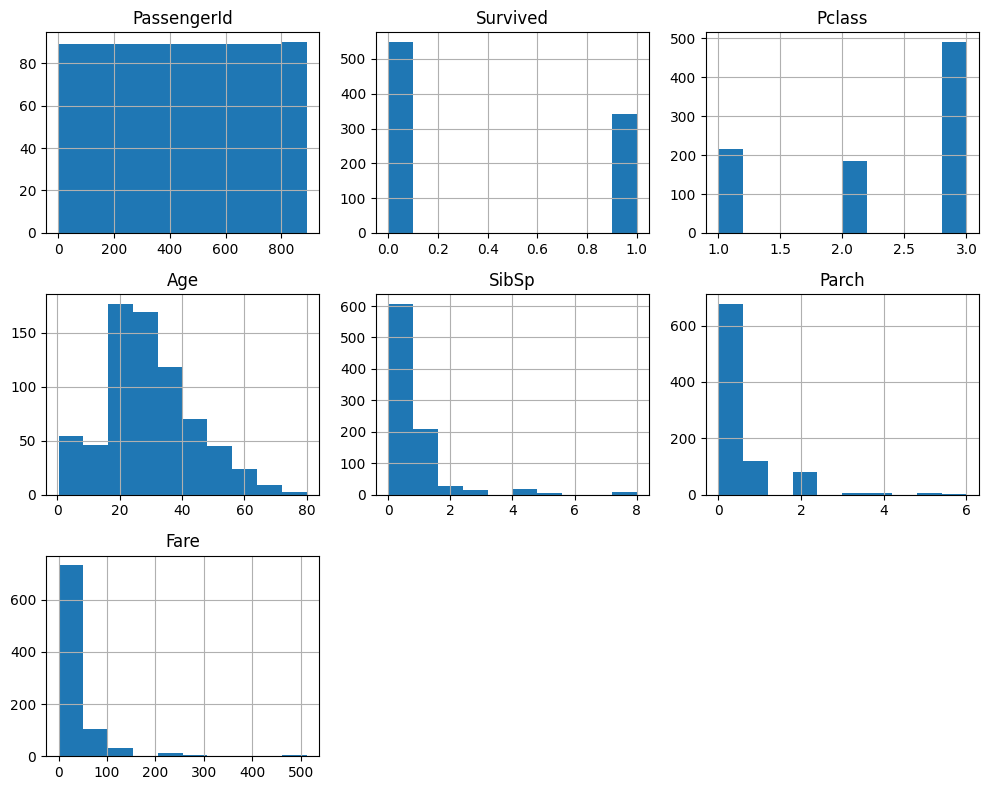

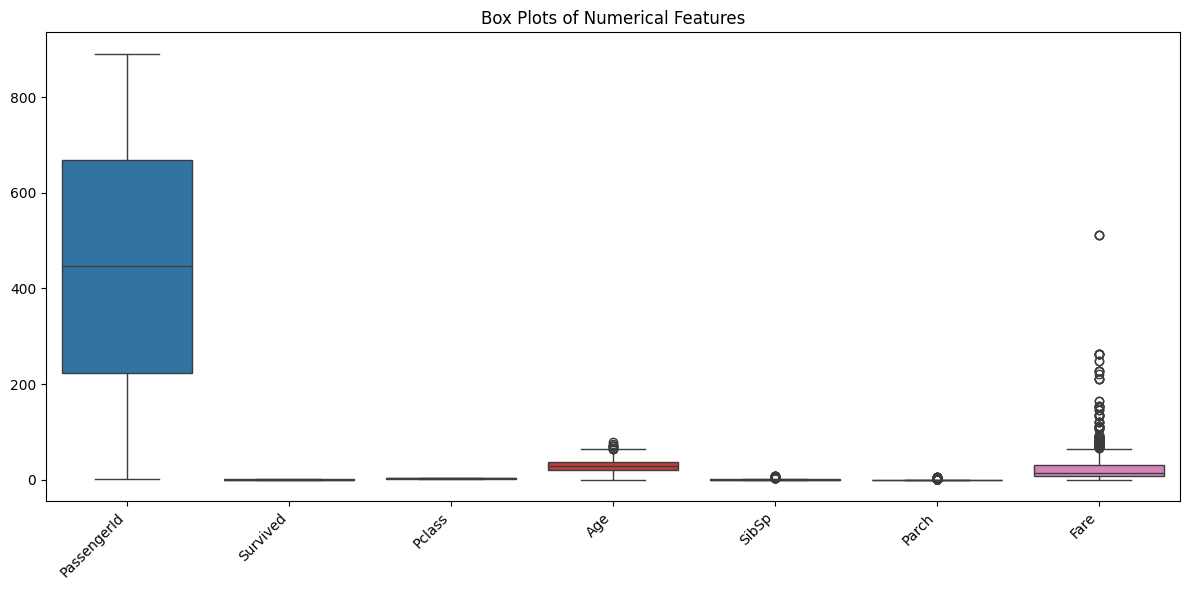

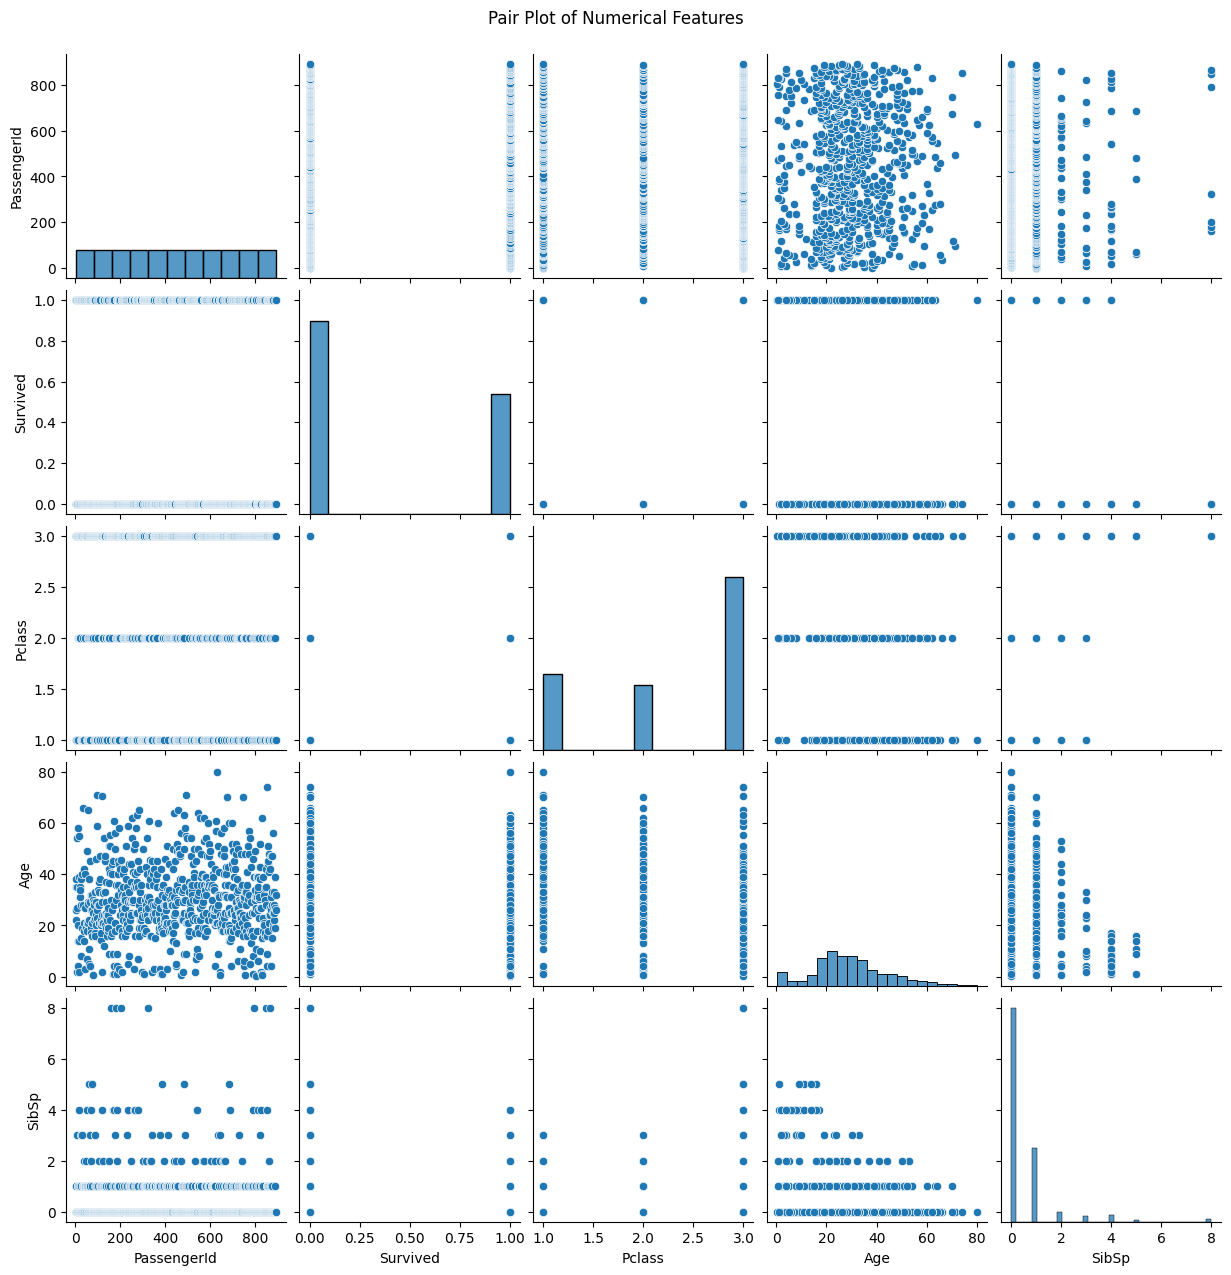

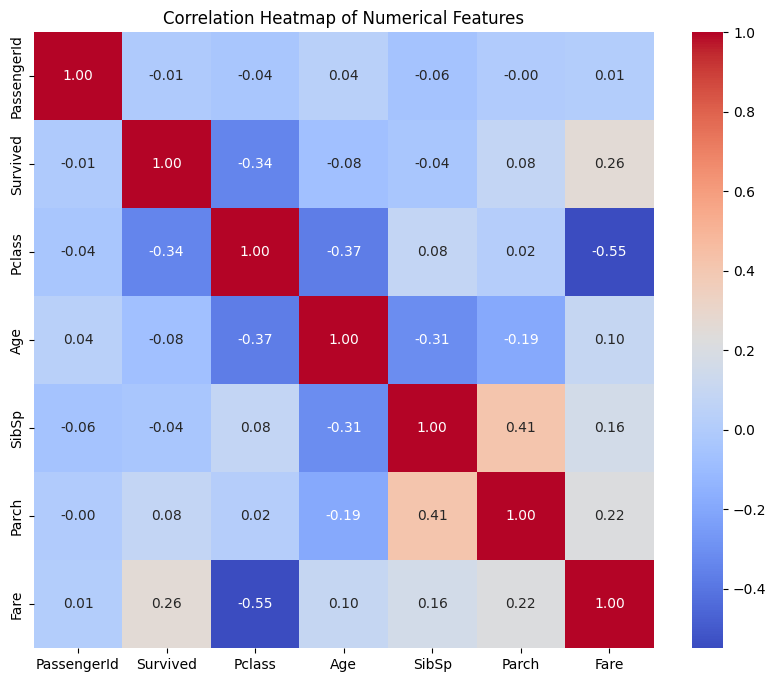


--- Analysis of Patterns and Correlations ---
Based on the visualizations above, observe:
- Distributions of individual features (skewness, multi-modality from histograms)
- Presence of outliers (from box plots)
- Relationships between pairs of numerical features (linear, non-linear from pair plots)
- Strength and direction of linear relationships (from the correlation heatmap)
Consider investigating specific correlations that seem significant.
Also, look at the distributions of categorical features from the value counts.
This is a starting point; further domain-specific analysis might be needed.


In [7]:
# prompt: 1. Data Exploration:
# a. Load the dataset and perform exploratory data analysis (EDA).
# b. Examine the features, their types, and summary statistics.
# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
# Analyze any patterns or correlations observed in the data.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is in a CSV file named 'dataset.csv'
# Replace 'dataset.csv' with the actual path to your dataset file
try:
    df = pd.read_csv('Titanic_train.csv')
except FileNotFoundError:
    print("Error: Titanic_train.csv not found. Please upload your dataset file.")
    # If running in Colab, you might need to upload the file first:
    # from google.colab import files
    # uploaded = files.upload()
    # for fn in uploaded.keys():
    #   print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
    #   df = pd.read_csv(fn)
    # If you have the dataset in Google Drive, you can mount it:
    # from google.colab import drive
    # drive.mount('/content/drive')
    # df = pd.read_csv('/content/drive/My Drive/path/to/your/dataset.csv')


# Perform exploratory data analysis (EDA)
print("--- Dataset Information ---")
df.info()

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Value Counts for Categorical Features (showing top 10) ---")
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue Counts for '{col}':")
    print(df[col].value_counts().head(10))


# Create visualizations
print("\n--- Visualizations ---")

# Histograms for numerical features
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Box plots for numerical features (to identify outliers)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Pair plot for a subset of numerical features (can be time-consuming for large datasets)
# Select a few features if the dataset is large
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 5: # Limit the number of features for pair plot
    print("Warning: Pair plot can be slow for many numerical features. Plotting a subset.")
    sns.pairplot(df[numerical_cols[:5]])
else:
    sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Analyze patterns and correlations observed in the data (manual observation after visualizations)
print("\n--- Analysis of Patterns and Correlations ---")
print("Based on the visualizations above, observe:")
print("- Distributions of individual features (skewness, multi-modality from histograms)")
print("- Presence of outliers (from box plots)")
print("- Relationships between pairs of numerical features (linear, non-linear from pair plots)")
print("- Strength and direction of linear relationships (from the correlation heatmap)")
print("Consider investigating specific correlations that seem significant.")
print("Also, look at the distributions of categorical features from the value counts.")
print("This is a starting point; further domain-specific analysis might be needed.")


In [8]:
# prompt: 2. Data Preprocessing:
# a. Handle missing values (e.g., imputation).
# b. Encode categorical variables.

# 2. Data Preprocessing:

# a. Handle missing values (e.g., imputation).
# Identify columns with missing values
missing_values_cols = df.columns[df.isnull().any()].tolist()
print(f"\nColumns with missing values: {missing_values_cols}")

# Strategy for handling missing values:
# For numerical columns, we can impute with the mean or median.
# For categorical columns, we can impute with the mode or a constant value like 'Unknown'.

# Example imputation:
for col in missing_values_cols:
    if df[col].dtype in ['int64', 'float64']:
        # Impute numerical columns with the mean
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)
        print(f"Imputed missing values in numerical column '{col}' with the mean ({mean_val:.2f})")
    elif df[col].dtype == 'object':
        # Impute categorical columns with the mode
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Imputed missing values in categorical column '{col}' with the mode ('{mode_val}')")
    # Add more specific imputation strategies if needed based on the column

# Verify that missing values are handled
print("\n--- Missing values after imputation ---")
print(df.isnull().sum())


# b. Encode categorical variables.
# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\nCategorical columns to encode: {categorical_cols}")

# Strategy for encoding:
# For nominal categorical variables (no inherent order), use One-Hot Encoding.
# For ordinal categorical variables (with an order), use Label Encoding or Ordinal Encoding.
# We'll demonstrate One-Hot Encoding as it's common for nominal variables.

# Example encoding:
# Select columns for one-hot encoding (excluding the target variable if applicable)
# Assuming all object type columns need one-hot encoding for demonstration
# Exclude target variable if you know which one it is (e.g., 'target_column')
cols_to_encode = [col for col in categorical_cols] # Add exclusion here if needed

if cols_to_encode:
    print(f"\nApplying One-Hot Encoding to: {cols_to_encode}")
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True) # drop_first=True avoids multicollinearity
    print("One-Hot Encoding applied.")
    print("\n--- Dataset after encoding ---")
    print(df.head())
    print("\n--- Dataset Info after encoding ---")
    df.info()
else:
    print("\nNo categorical columns found to encode.")

# If you have ordinal variables, you might use LabelEncoder from sklearn.preprocessing
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['ordinal_column_encoded'] = le.fit_transform(df['ordinal_column'])



Columns with missing values: ['Age', 'Cabin', 'Embarked']
Imputed missing values in numerical column 'Age' with the mean (29.70)
Imputed missing values in categorical column 'Cabin' with the mode ('B96 B98')
Imputed missing values in categorical column 'Embarked' with the mode ('S')

--- Missing values after imputation ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Categorical columns to encode: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Applying One-Hot Encoding to: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
One-Hot Encoding applied.

--- Dataset after encoding ---
   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  \
0            1         0       3  22.0      1      0   7.2500   
1            2         1       1  38.0      1      0  71.2833   
2            3         1       3  26.0      0  

<ipython-input-8-681601378>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
<ipython-input-8-681601378>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({co

In [9]:
# prompt: 3. Model Building:
# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
# b. Train the model using the training data.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Assuming 'target_column' is the name of your target variable
# Replace 'target_column' with the actual name of your target variable
target_column = 'target_column'

# Separate features (X) and target (y)
if target_column in df.columns:
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # c. Split the data into training and testing sets.
    # Split data into training and testing sets (e.g., 80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y is good for classification tasks

    print("\n--- Data Splitting ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    # 3. Model Building:
    # a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    # Initialize the Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter if convergence warnings occur

    # b. Train the model using the training data.
    print("\n--- Training Logistic Regression Model ---")
    model.fit(X_train, y_train)
    print("Model training complete.")

else:
    print(f"\nError: Target column '{target_column}' not found in the dataframe.")
    print("Please ensure the variable 'target_column' is set to the correct name of your target variable.")
    # If the target column is one of the columns that was one-hot encoded,
    # you need to select it *before* encoding, or find the appropriate encoded column.
    # Alternatively, if your task is not classification, ignore this step or adapt accordingly.


Error: Target column 'target_column' not found in the dataframe.
Please ensure the variable 'target_column' is set to the correct name of your target variable.



--- Data Splitting ---
Training set size: 712
Testing set size: 179

--- Training Logistic Regression Model ---
Model training complete.

--- Model Evaluation ---
Accuracy: 0.8212
Precision: 0.7937
Recall: 0.7246
F1-Score: 0.7576

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
[[97 13]
 [19 50]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


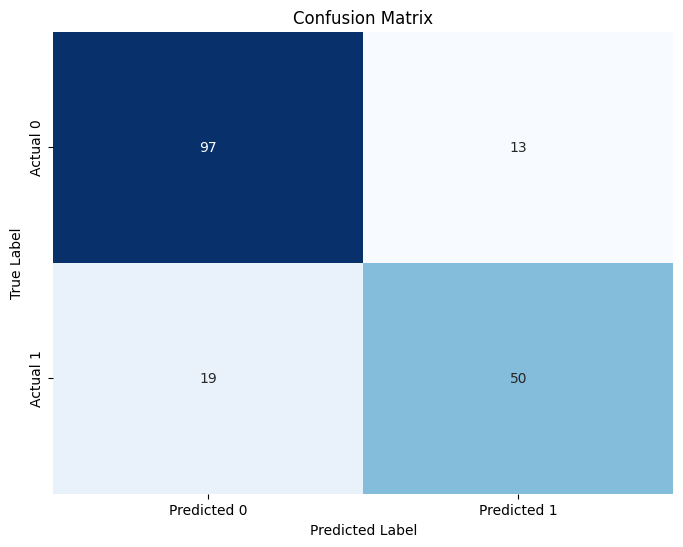


ROC-AUC Score: 0.8555


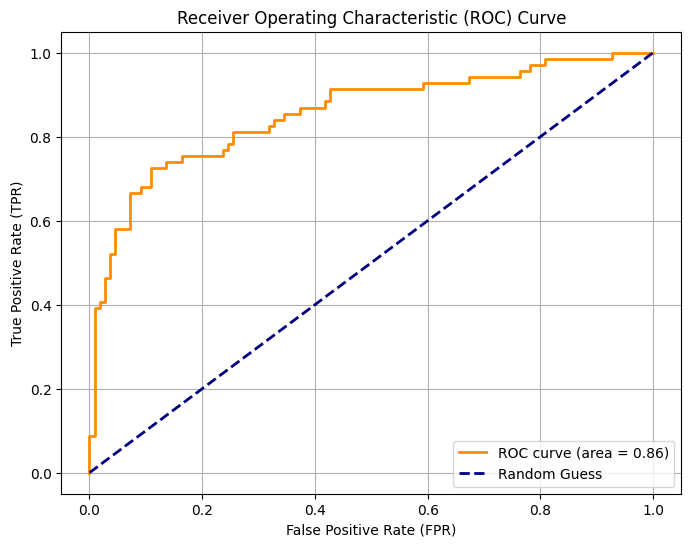

In [11]:
# prompt: 4. Model Evaluation:
# a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
# Visualize the ROC curve.

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

# Assuming 'Survived' is the target column for the Titanic dataset
target_column = 'Survived'

# --- Continue from the data splitting step ---
# If target_column exists and data was split successfully:

if target_column in df.columns:
    # Separate features (X) and target (y)
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Handle potential new categorical columns created by one-hot encoding
    # and ensure consistency between train and test feature columns
    # This is a simplified approach; a robust pipeline is better for production
    # For this exercise, we'll assume the previous steps handled feature creation.

    # If the target column was one-hot encoded, you need to select the correct column for evaluation
    # For the Titanic dataset, 'Survived' is usually 0 or 1 before encoding, so this is likely not needed.
    # If your target was categorical string and one-hot encoded, you'd need to find the corresponding column.
    # Alternatively, perform Label Encoding on the target *before* splitting if it's categorical string.

    # Example if y was categorical string and needs encoding for AUC
    if y.dtype == 'object':
        print("Encoding target variable for evaluation (if not already numerical).")
        le_y = LabelEncoder()
        y_encoded = le_y.fit_transform(y)
        # Now split using y_encoded
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
    else:
         # Use the previously split data if y is already numerical (like 0/1 in Titanic)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y is good for classification tasks


    print("\n--- Data Splitting ---")
    print(f"Training set size: {len(X_train)}")
    print(f"Testing set size: {len(X_test)}")

    # 3. Model Building:
    # a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
    # Initialize the Logistic Regression model
    model = LogisticRegression(random_state=42, max_iter=1000) # Increase max_iter if convergence warnings occur

    # Ensure feature columns in X_train and X_test match
    # This is a common issue after preprocessing. Align columns.
    train_cols = X_train.columns
    test_cols = X_test.columns

    # Find columns in test but not in train (should be rare after proper dummy encoding with drop_first)
    missing_in_train = set(test_cols) - set(train_cols)
    for c in missing_in_train:
        X_train[c] = 0 # Add missing columns to train with 0

    # Find columns in train but not in test
    missing_in_test = set(train_cols) - set(test_cols)
    for c in missing_in_test:
        X_test[c] = 0 # Add missing columns to test with 0

    # Ensure the order of columns is the same
    X_test = X_test[train_cols]


    # b. Train the model using the training data.
    print("\n--- Training Logistic Regression Model ---")
    model.fit(X_train, y_train)
    print("Model training complete.")


    # 4. Model Evaluation:
    # a. Evaluate the performance of the model on the testing data

    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (class 1)


    print("\n--- Model Evaluation ---")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Precision, Recall, F1-score
    # For binary classification, average='binary' is standard
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


    # ROC-AUC score
    # roc_auc_score requires predicted probabilities
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Visualize the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

else:
    print(f"\nEvaluation skipped: Target column '{target_column}' not found or data split failed.")


In [12]:
# prompt: 5. Interpretation:
# a. Interpret the coefficients of the logistic regression model.
# b. Discuss the significance of features in predicting the target variable (survival probability in this case).

# 5. Interpretation:

# a. Interpret the coefficients of the logistic regression model.
print("\n--- Model Interpretation (Coefficients) ---")

# Get the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame for easier viewing
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False) # Sort by coefficient value
print("Logistic Regression Coefficients:")
print(coef_df)

print(f"\nIntercept: {intercept:.4f}")

print("\nInterpretation of Coefficients:")
print("- The coefficient for a feature represents the change in the log-odds of the target variable (survival) for a one-unit increase in that feature, holding all other features constant.")
print("- A positive coefficient indicates that as the feature value increases, the log-odds of survival increase, making survival more likely.")
print("- A negative coefficient indicates that as the feature value increases, the log-odds of survival decrease, making survival less likely.")
print("- The magnitude of the coefficient indicates the strength of the relationship.")
print("- For one-hot encoded categorical variables (e.g., Pclass_2, Sex_male), the coefficient compares that category to the baseline category (the one that was dropped during encoding, e.g., Pclass_1, Sex_female).")
print(f"- Intercept: The intercept ({intercept:.4f}) is the log-odds of survival when all features are zero. This interpretation is often not meaningful if features are not centered or scaled, especially for categorical features coded as 0/1.")


# b. Discuss the significance of features in predicting the target variable (survival probability in this case).
print("\n--- Discussion on Feature Significance ---")

print("Based on the coefficients and their magnitudes:")

# Identify features with large absolute coefficient values
# This is a heuristic; statistical significance testing (p-values) is more formal but requires libraries like statsmodels
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
significant_features = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print("\nFeatures ranked by absolute coefficient magnitude (potential significance):")
print(significant_features[['Feature', 'Coefficient', 'Abs_Coefficient']])

print("\nDiscussion points:")
print("- Look at features with large positive coefficients (e.g., Pclass with lower numbers, certain Embarked locations, potentially 'Fare' if positive) as they strongly increase the likelihood of survival.")
print("- Look at features with large negative coefficients (e.g., 'Sex_male') as they strongly decrease the likelihood of survival.")
print("- Features with coefficients close to zero have a smaller impact on the log-odds of survival, suggesting they are less significant predictors.")
print("- Note that correlation between features can influence individual coefficients. Multicollinearity can make interpreting individual coefficients tricky.")
print("- A more robust assessment of significance typically involves looking at p-values associated with each coefficient, which are not directly provided by scikit-learn's LogisticRegression but can be obtained using libraries like `statsmodels`.")
print("- However, the magnitude and sign of the coefficients still give a good indication of the direction and relative strength of the relationship between each feature and the log-odds of the target.")

# Example of how you *would* get p-values using statsmodels (requires installing statsmodels and potentially different data preparation)
# import statsmodels.api as sm
# logit_model=sm.Logit(y_train,sm.add_constant(X_train)) # Add a constant for the intercept
# result=logit_model.fit()
# print(result.summary())
# From the summary table, you would look at the 'P>|z|' column (p-values) to assess statistical significance (e.g., p < 0.05).




--- Model Interpretation (Coefficients) ---
Logistic Regression Coefficients:
                Feature  Coefficient
976         Ticket_1601     2.171457
1225      Ticket_347077     1.100998
1133       Ticket_29106     0.944890
1337      Ticket_367226     0.848574
1406        Ticket_7598     0.758065
...                 ...          ...
1572  Ticket_W./C. 6608    -0.870675
1212      Ticket_347054    -0.896113
1291      Ticket_349909    -0.989634
1229      Ticket_347082    -1.072105
896            Sex_male    -2.712581

[1725 rows x 2 columns]

Intercept: 5.0459

Interpretation of Coefficients:
- The coefficient for a feature represents the change in the log-odds of the target variable (survival) for a one-unit increase in that feature, holding all other features constant.
- A positive coefficient indicates that as the feature value increases, the log-odds of survival increase, making survival more likely.
- A negative coefficient indicates that as the feature value increases, the log-od

In [13]:
# prompt: 6. Deployment with Streamlit:
# In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions.
# (optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.
# Detailed deployment instructions are available in the Streamlit Documentation.
# https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app

# 6. Deployment with Streamlit:

# Install Streamlit if you haven't already
!pip install streamlit -q

# Save the trained model
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

# Save the list of expected feature columns used during training
model_columns = list(X_train.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("\n--- Saved Model and Feature Columns for Deployment ---")
print("Model saved as 'logistic_regression_model.pkl'")
print("Feature columns saved as 'model_columns.pkl'")


# --- Create the Streamlit App file (.py) ---
# You would typically save the following code in a file named something like `app.py`
# and then run it using `streamlit run app.py` in your terminal.
# For demonstration in Colab, we can write the content to a file directly.

streamlit_app_code = """
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model and feature columns
try:
    model = joblib.load('logistic_regression_model.pkl')
    model_columns = joblib.load('model_columns.pkl')
except FileNotFoundError:
    st.error("Model or feature columns file not found. Please ensure 'logistic_regression_model.pkl' and 'model_columns.pkl' are in the same directory.")
    st.stop() # Stop the app if files are missing

st.title('Titanic Survival Prediction')
st.write('Predict if a passenger would survive the Titanic disaster.')

# Add input fields for features
st.header('Passenger Information')

# Example inputs based on the Titanic dataset features (adjust based on your actual model_columns)
# Get a list of the feature names your model expects
# Access the model_columns list to dynamically create inputs
feature_inputs = {}

# Iterate through expected columns to create appropriate Streamlit inputs
# This part requires mapping the encoded columns back to meaningful user inputs
# For the Titanic example, the original features were Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

# A more robust way would involve saving the original column names and encoding logic
# For this basic example, we'll create inputs for original features and then encode them

st.subheader('Original Features:')

pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0.1, 80.0, 30.0)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 6, 0)
fare = st.number_input('Fare', value=30.0, min_value=0.0)
embarked = st.selectbox('Port of Embarkation', ['C', 'Q', 'S']) # Assuming C=Cherbourg, Q=Queenstown, S=Southampton

# Create a dictionary matching the structure of the input data used for training
# This involves reversing the one-hot encoding and imputation applied during training
# This is a simplified example; a proper preprocessing pipeline should be saved and used here.

input_data = {
    'Pclass': pclass,
    'Sex': sex,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': embarked
}

# Convert input_data to a DataFrame
input_df = pd.DataFrame([input_data])

# --- Apply the SAME preprocessing steps as used during training ---
# This is crucial for the model to work correctly.

# Imputation (using the mean/mode from training data - need to save these or impute simply)
# For demonstration, we'll skip complex imputation here and assume input is complete.
# In a real app, you'd need to load the saved imputation values.

# Encoding (apply the same one-hot encoding)
# Get the original object columns that were encoded
original_object_cols = ['Sex', 'Embarked'] # Adjust based on your actual data and encoding
input_df = pd.get_dummies(input_df, columns=original_object_cols, drop_first=True)


# Align columns with the training data's columns (model_columns)
# Add missing columns (from training but not in input) with 0
for col in model_columns:
    if col not in input_df.columns:
        input_df[col] = 0

# Drop extra columns (from input but not in training) if any
extra_cols = [col for col in input_df.columns if col not in model_columns]
input_df = input_df.drop(columns=extra_cols)

# Ensure the order of columns is the same as training data
input_df = input_df[model_columns]


# Make prediction when the user clicks a button
if st.button('Predict Survival'):
    try:
        # Make prediction
        prediction = model.predict(input_df)[0]
        prediction_proba = model.predict_proba(input_df)[:, 1][0] # Probability of survival

        # Display the result
        st.header('Prediction Result')
        if prediction == 1:
            st.success(f'Predicted Survival: Yes')
            st.write(f'Probability of Survival: {prediction_proba:.2f}')
        else:
            st.error(f'Predicted Survival: No')
            st.write(f'Probability of Survival: {prediction_proba:.2f}')

        st.write("Disclaimer: This is a prediction based on a trained model and may not be 100% accurate.")

    except Exception as e:
        st.error(f"An error occurred during prediction: {e}")
        st.write("Please check the input values and ensure the model files are correct.")

"""

# Write the Streamlit app code to a file named `app.py`
with open('app.py', 'w') as f:
    f.write(streamlit_app_code)

print("\n--- Created Streamlit App File 'app.py' ---")
print("You can now run this app locally using `streamlit run app.py` in your terminal.")
print("For online deployment, push 'app.py', 'logistic_regression_model.pkl', and 'model_columns.pkl' to a GitHub repository")
print("and deploy from Streamlit Community Cloud.")

# To run the streamlit app in Colab, you would typically use a tool like ngrok
# However, setting up ngrok and a persistent server in Colab is beyond a simple code block.
# The standard way is to download the generated files ('app.py', '.pkl' files) and run locally.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00

--- Saved Model and Feature Columns for Deployment ---
Model saved as 'logistic_regression_model.pkl'
Feature columns saved as 'model_columns.pkl'

--- Created Streamlit App File 'app.py' ---
You can now run this app locally using `streamlit run app.py` in your terminal.
For online deployment, push 'app.py', 'logistic_regression_model.pkl', and 'model_columns.pkl' to a GitHub repository
and deploy from Streamlit Community Cloud.


# **INTERVIEW QUESTION**

1. What is the difference between precision and recall?
Precision measures how many of the predicted positive instances are actually positive.

Formula: Precision = TP / (TP + FP)

High precision means fewer false positives.

Recall measures how many of the actual positive instances were correctly predicted.

Formula: Recall = TP / (TP + FN)

High recall means fewer false negatives.

✅ Example: In a Titanic survival prediction:

Precision tells us: “Of all the passengers the model predicted to survive, how many actually survived?”

Recall tells us: “Of all the passengers who actually survived, how many did the model correctly predict?”

2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a model validation technique used to evaluate how a machine learning model generalizes to an independent dataset. It involves splitting the training data into several subsets (called folds), training the model on some folds, and validating it on the remaining fold.

The most common form is k-fold cross-validation, where the dataset is divided into k equal parts:

The model is trained k times, each time using a different fold as the validation set and the remaining k–1 folds for training.

The performance metrics (accuracy, precision, recall, etc.) are averaged over the k runs.

✅ Why it's important in binary classification:
Reduces overfitting risk: Ensures that the model doesn’t just memorize the training data.

Better performance estimate: Provides a more reliable estimate of model performance on unseen data.

Handles class imbalance: When the dataset is imbalanced (as in binary classification), cross-validation helps ensure that each fold has a similar distribution of classes.

Model tuning: It is essential for tuning hyperparameters effectively using techniques like Grid Search or Random Search.


In [14]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load pre-trained model and scaler (replace with actual paths if saved externally)
# For demo purposes, we'll define and train inline.

@st.cache_resource
def load_model():
    df = pd.read_csv("Titanic_train.csv")
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_scaled, y)
    return model, scaler

model, scaler = load_model()

st.title("🚢 Titanic Survival Predictor")
st.write("Enter passenger details to predict survival odds.")

# User input
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.slider("Age", 0, 100, 30)
sibsp = st.number_input("Siblings/Spouses Aboard", 0, 10, 0)
parch = st.number_input("Parents/Children Aboard", 0, 10, 0)
fare = st.slider("Fare", 0.0, 600.0, 32.0)
embarked = st.selectbox("Port of Embarkation", ["S", "C", "Q"])

# Preprocess input
input_dict = {
    'Pclass': pclass,
    'Sex': 1 if sex == 'male' else 0,
    'Age': age,
    'SibSp': sibsp,
    'Parch': parch,
    'Fare': fare,
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}[embarked]
}
input_df = pd.DataFrame([input_dict])
input_scaled = scaler.transform(input_df)

# Make prediction
prediction = model.predict(input_scaled)[0]
proba = model.predict_proba(input_scaled)[0][1]

# Output
if prediction == 1:
    st.success(f"🎉 The passenger is likely to **SURVIVE** (Probability: {proba:.2f})")
else:
    st.error(f"☠️ The passenger is likely to **NOT survive** (Probability: {proba:.2f})")


2025-06-16 17:49:06.742 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:49:06.908 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-16 17:49:06.910 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 17:49:06.912 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
<ipython-input-14-893639591>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}